## To predict the percentage of a student based on the no. of study hours.



### Importing libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
print('Libraries successfully imported!!!')

Libraries successfully imported!!!


### Importing the data

In [41]:
df = pd.read_csv('student_scores.csv')
print('Data imported successfully!!!')
df

Data imported successfully!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Analysis

In [3]:
df.shape

(25, 2)

In [39]:
df.describe()

,Actual Score,Predicted Score
count,5.000000,5.000000
mean,54.000000,53.367340
std,27.120103,25.417991
min,21.000000,27.032088
25%,30.000000,27.032088
50%,62.000000,59.951153
75%,76.000000,69.633232
max,81.000000,83.188141


In [38]:
df.isna()

,Actual Score,Predicted Score
8,False,False
16,False,False
0,False,False
23,False,False
11,False,False


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 8 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actual Score     5 non-null      int64  
 1   Predicted Score  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0 bytes


### Data Visualization

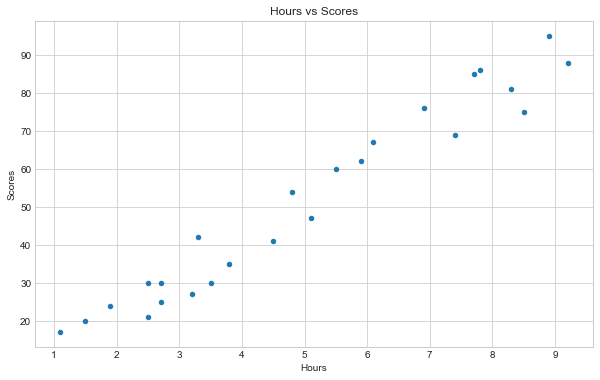

In [14]:
#1. setup plot
ax = df.plot(x='Hours',y='Scores',figsize=(10, 6),kind='scatter') 
plt.style.use('seaborn-whitegrid')
#2. customize plot
ax.set(title = "Hours vs Scores",
       xlabel = "Hours",
       ylabel = "Scores");



### Splitting the data into training and test sets

In [7]:
X = df.drop('Scores',axis=1) 
y = df.Scores 

In [8]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training the model (using Linear Regression)

In [9]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Testing the model

In [10]:
y_preds = regressor.predict(X_test)

Plotting Training Set.


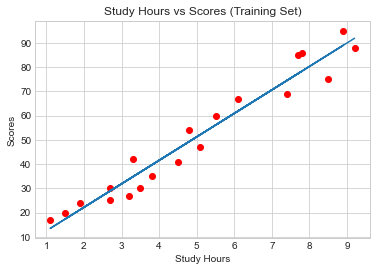

In [44]:
print('Plotting Training Set.')
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train))
plt.title('Study Hours vs Scores (Training Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

Plotting Test Set.


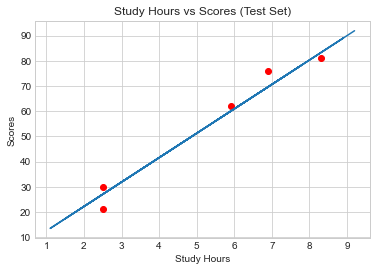

In [43]:
print('Plotting Test Set.')
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train))
plt.title('Study Hours vs Scores (Test Set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

In [18]:
df = pd.DataFrame({'Actual Score':y_test, 'Predicted Score': y_preds})
df

,Actual Score,Predicted Score
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Evaluating the Model

In [21]:
regressor.score(X_test,y_test)

0.9678055545167994

In [49]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_preds))

Mean Absolute Error: 3.9207511902099244


In [31]:
print('intercept',regressor.intercept_)
print('slope',regressor.coef_)

intercept 2.826892353899737
slope [9.68207815]


### What would be predicted if a student studies for 9.25 hours per day? (Prediction using custom input)

In [35]:
def pred_score(X,regressor):
    print('No. of hours studied: ',X)
    print('Score: ',regressor.intercept_+regressor.coef_*X)
pred_score(9.25,regressor);

No. of hours studied:  9.25
Score:  [92.38611528]
